In [74]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv("dailyActivity_merged.csv")
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850


In [51]:
df.shape

(457, 15)

In [52]:
df['Id'].nunique()

35

In [53]:
cols = ['Id','ActivityDate','TotalSteps','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']
df = df[cols] 

In [54]:
df.head()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,33,12,205,804,1819
1,1503960366,3/26/2016,17609,89,17,274,588,2154
2,1503960366,3/27/2016,12736,56,5,268,605,1944
3,1503960366,3/28/2016,13231,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,28,28,243,763,1886


In [62]:
df['TotalMinutes'] =  df.VeryActiveMinutes +df.FairlyActiveMinutes + df.LightlyActiveMinutes + df.SedentaryMinutes
df.head()

,Id,ActivityDate,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,3/25/2016,11004,33,12,205,804,1819,1054
1,1503960366,3/26/2016,17609,89,17,274,588,2154,968
2,1503960366,3/27/2016,12736,56,5,268,605,1944,934
3,1503960366,3/28/2016,13231,39,20,224,1080,1932,1363
4,1503960366,3/29/2016,12041,28,28,243,763,1886,1062


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Id                    457 non-null    int64 
 1   ActivityDate          457 non-null    object
 2   TotalSteps            457 non-null    int64 
 3   VeryActiveMinutes     457 non-null    int64 
 4   FairlyActiveMinutes   457 non-null    int64 
 5   LightlyActiveMinutes  457 non-null    int64 
 6   SedentaryMinutes      457 non-null    int64 
 7   Calories              457 non-null    int64 
 8   TotalMinutes          457 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 32.3+ KB


In [85]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df.dtypes

Id                               int64
ActivityDate            datetime64[ns]
TotalSteps                       int64
VeryActiveMinutes                int64
FairlyActiveMinutes              int64
LightlyActiveMinutes             int64
SedentaryMinutes                 int64
Calories                         int64
TotalMinutes                     int64
dtype: object

In [86]:
import datetime as dt
df['Day'] = df.ActivityDate.dt.day_name()

In [87]:
df.describe()

,Id,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,16.623632,13.070022,170.070022,995.282276,2189.452954,1195.045952
std,2.293781e+09,5398.493064,28.919704,36.208635,122.205372,337.021404,815.484523,306.457382
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,41.000000
25%,2.347168e+09,1988.000000,0.000000,0.000000,64.000000,728.000000,1776.000000,985.000000
50%,4.057193e+09,5986.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000,1440.000000
75%,6.391747e+09,10198.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000,1440.000000
max,8.877689e+09,28497.000000,202.000000,660.000000,720.000000,1440.000000,4562.000000,1440.000000


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'ActivityDate'}>,
        <AxesSubplot:title={'center':'TotalSteps'}>],
       [<AxesSubplot:title={'center':'VeryActiveMinutes'}>,
        <AxesSubplot:title={'center':'FairlyActiveMinutes'}>,
        <AxesSubplot:title={'center':'LightlyActiveMinutes'}>],
       [<AxesSubplot:title={'center':'SedentaryMinutes'}>,
        <AxesSubplot:title={'center':'Calories'}>,
        <AxesSubplot:title={'center':'TotalMinutes'}>]], dtype=object)

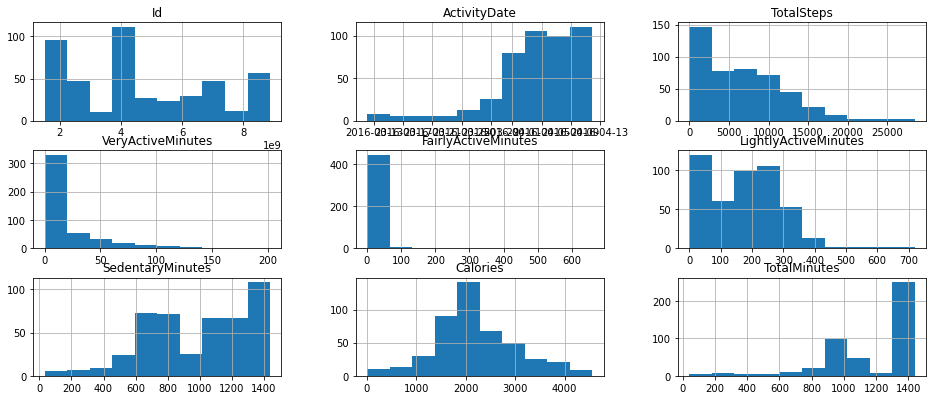

In [88]:
df.hist(figsize=(16,6.5))

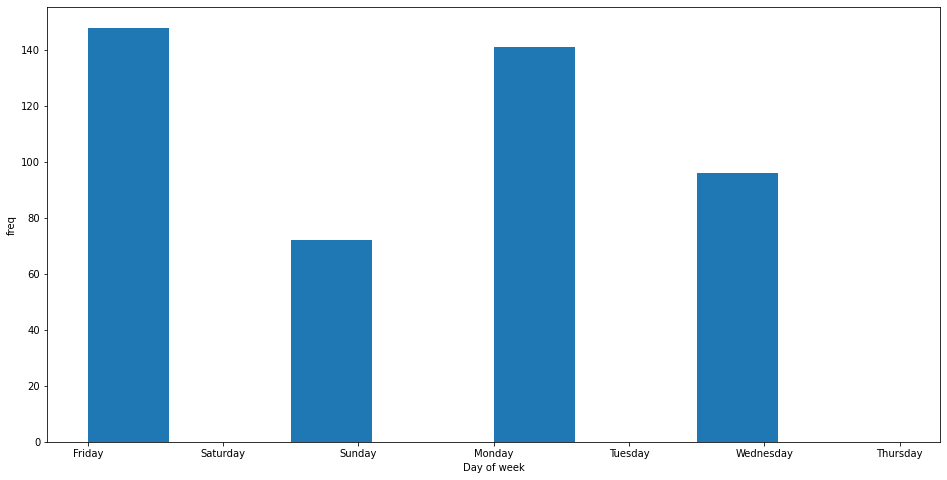

In [130]:
plt.figure(figsize=[16,8])
plt.hist(df.Day,bins=4,width=0.6)
plt.xlabel('Day of week')
plt.ylabel('freq')
plt.show()

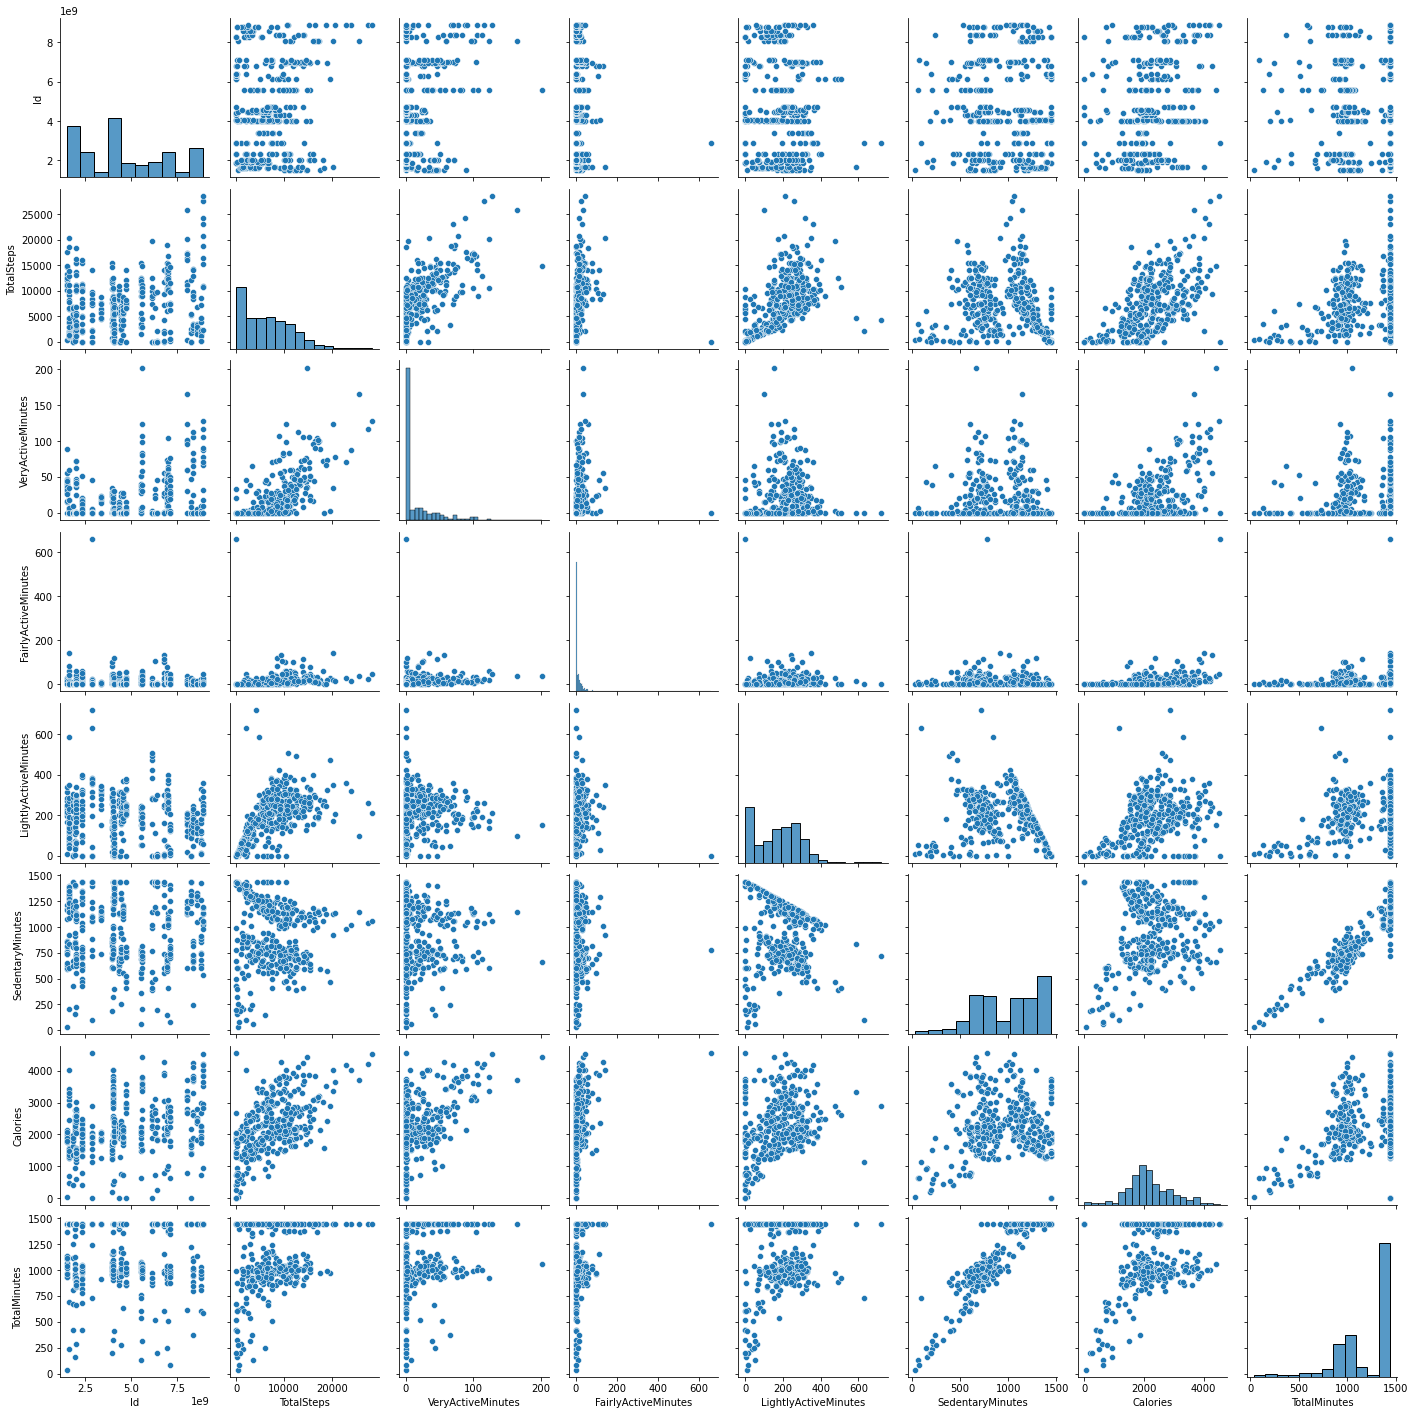

In [90]:
sns.pairplot(df)

<AxesSubplot:xlabel='TotalMinutes', ylabel='Day'>

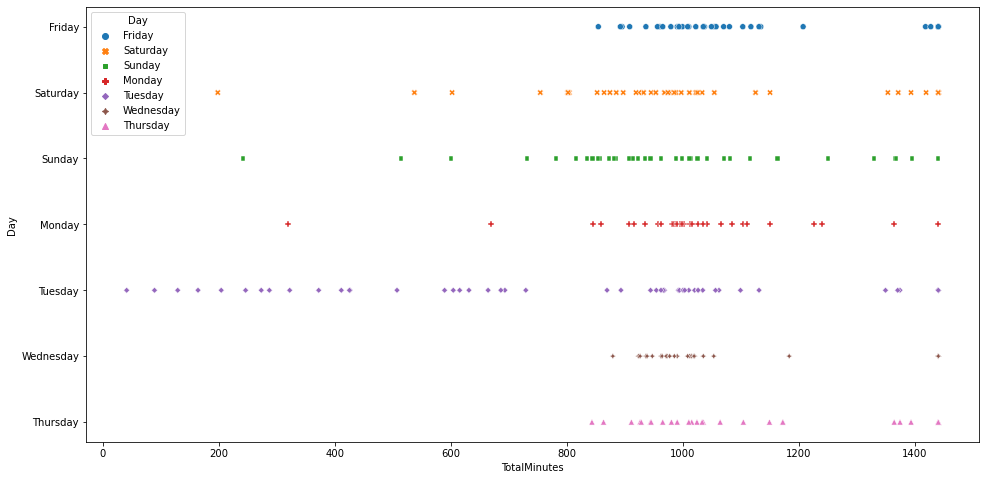

In [99]:
plt.figure(figsize=[16,8])
sns.scatterplot(x= df.TotalMinutes,y = df.Day,hue=df.Day ,style=df.Day )

<AxesSubplot:>

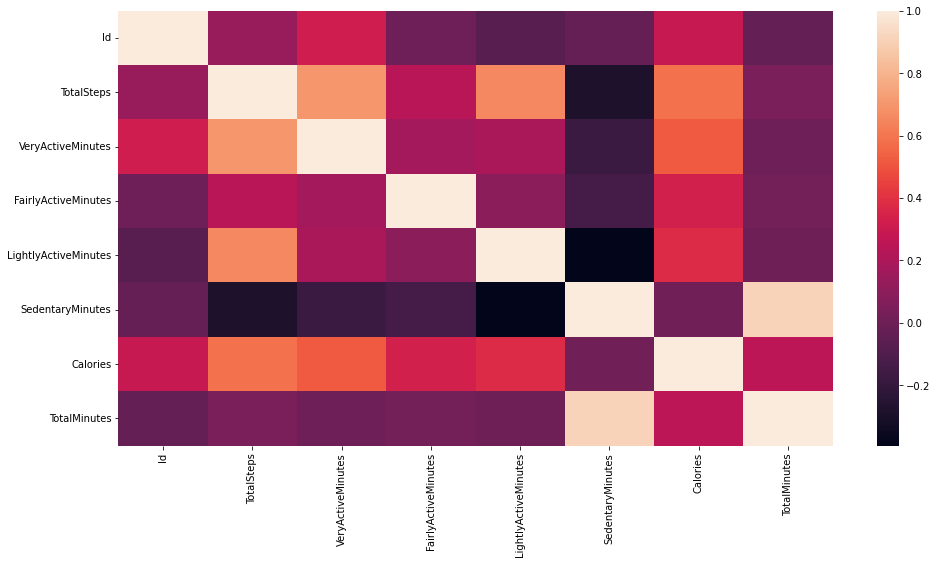

In [101]:
plt.figure(figsize=[16,8])
sns.heatmap(df.corr())

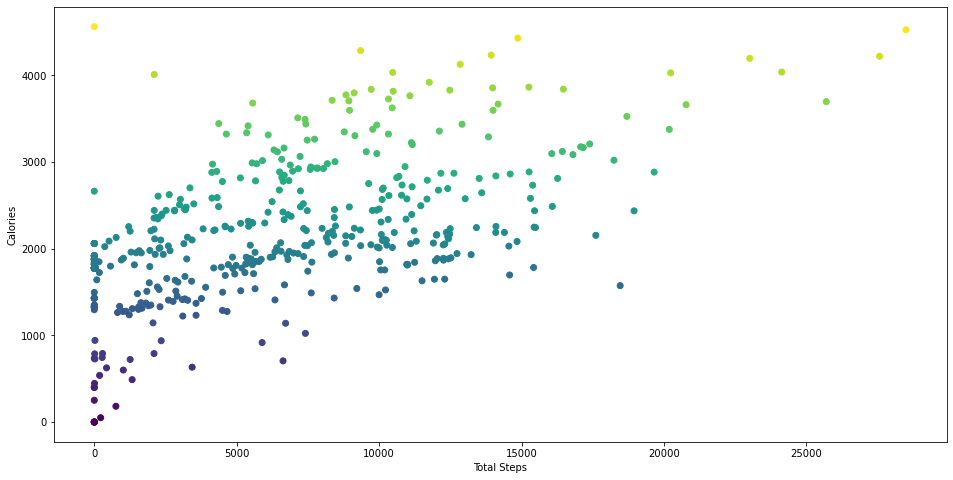

In [102]:
plt.figure(figsize=[16,8])
plt.scatter(df.TotalSteps,df.Calories, c =df.Calories)
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

([<matplotlib.patches.Wedge at 0x2853089ddc0>,
 [Text(1.0989497904356313, 0.04805578114526856, 'VeryActiveMinutes'),
  Text(1.0918559053434749, 0.13360644433028324, 'FairlyActiveMinutes'),
  Text(0.9058718945171875, 0.6240161141539868, 'LightlyActiveMinutes'),
  Text(-0.9517747128281627, -0.5514751998239525, 'SedentaryMinutes')])

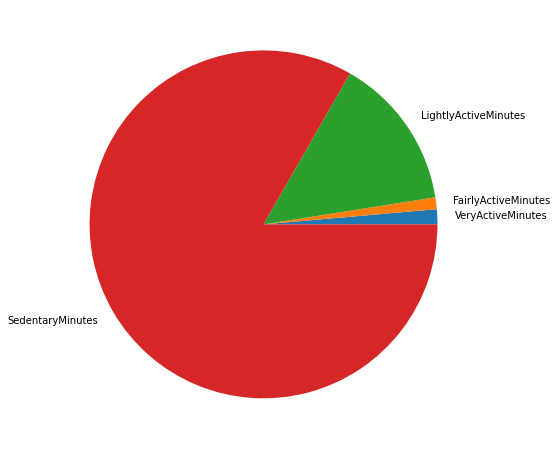

In [125]:
plt.figure(figsize=[16,8])
VeryActiveMinutes = df.VeryActiveMinutes.sum()
FairlyActiveMinutes = df.FairlyActiveMinutes.sum()
LightlyActiveMinutes = df.LightlyActiveMinutes.sum()
SedentaryMinutes = df.SedentaryMinutes.sum()
minutes = [VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes]
labels= ['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
plt.pie(minutes,labels=labels)